# Multiclass Classification

#### Using tensorflow 2.0 at the back end and Keras functional API  

In [12]:
import tensorflow as tf 
from tensorflow import keras
import cv2

### Load the fashion mnist dataset using the keras.datasets

In [2]:
fashion_mnist = keras.datasets.fashion_mnist    # Object
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()    #Function

4423680/4422102 [==============================] - 5s 1us/step


#### Shape and data type of the datasets
- 60,000 images of size 28x28 in grey scale

In [5]:
print(X_train.shape)
X_train.dtype

(60000, 28, 28)


dtype('uint8')

### Normalizing images. 
- Since gradient descent is used scaling of input features is required.
- Using MLP's for image classification. Normalization helps remove noise and helps for faster convergence 

In [7]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

### Class names of this dataset

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

### View sample from the dataset
- Plot images


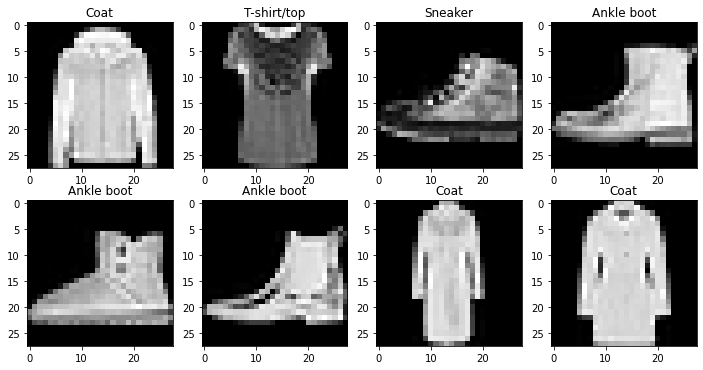

In [59]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
k = 0
for i in range(2):
    for j in range(4):
        ax[i, j].imshow(X_train[k], cmap='gray', vmin=0, vmax=1)
        ax[i, j].set_title(class_names[y_train[k]], fontsize = 12)
        k+=1
plt.show()

### Build a sequential keras model
- MLP (Multi layer perceptron)

In [60]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')

])


### Compile the model
- loss: sparse_categorical_crossentropy
- metrics: accuracy
- optimizer: Stochastic gradient descent

In [61]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
             )

### Summary of the model

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Trraining and evaluating the model

In [64]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 100us/sample - loss: 0.7106 - accuracy: 0.7623 - val_loss: 0.5081 - val_accuracy: 0.8338
Epoch 2/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4893 - accuracy: 0.8293 - val_loss: 0.4396 - val_accuracy: 0.8536
Epoch 3/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4462 - accuracy: 0.8436 - val_loss: 0.4171 - val_accuracy: 0.8602
Epoch 4/30
55000/55000 [==============================] - 4s 77us/sample - loss: 0.4197 - accuracy: 0.8529 - val_loss: 0.4034 - val_accuracy: 0.8636
Epoch 5/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3983 - accuracy: 0.8601 - val_loss: 0.3974 - val_accuracy: 0.8638
Epoch 6/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.3825 - accuracy: 0.8658 - val_loss: 0.3698 - val_accuracy: 0.8776
Epoch 7/30
55000/55000 [==============================] 

### Plot accuracy and loss curves using history object

In [65]:
import pandas as pd


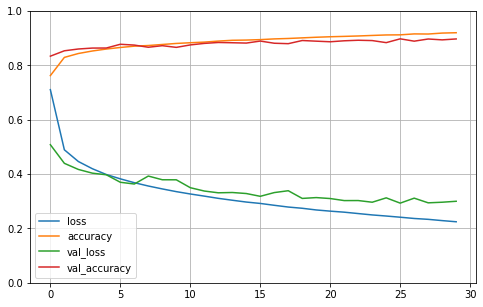

In [67]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Evaluate and Predict

In [68]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 46us/sample - loss: 73.3966 - accuracy: 0.8391


[73.39657755889893, 0.8391]

In [69]:
X_instance = X_test[:3]
print(X_instance)
# y_prob = model.predict(X_)
# y_prob.round(2)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
